#  Tarea 1


Supongamos que tenemos la siguiente ecuación diferencial en el intervalo $[x_0,x_f]$:

$$
 \frac{d\vec{y}}{dx}=\vec f(x,\vec y) \qquad ---------------(1)
 $$


# Método de Euler

Para este método hacemos una partición del intervalo mencionado $\{x_n\}$ tal que $h=x_{n+1}-x_{n}$. Integramos la expresión (1) en el intervalo $[x_n,x_{n+1}]$ :

$$
\vec y_{n+1}=\vec y_n+ \int^{x_{n+1}}_{x_n}\vec f(x, \vec{y}) dx---------------(2)
$$

Donde hemos llamado $y_n=\vec(x_n)$. Spongamos además que donde $\vec{y_0}$ son las condiciones iniciales de nuestro problema. Aproximamos a   $\vec f$ usando su serie de Taylor a orden cero. Así $\vec f(x,\vec y) = \vec f(x_n, \vec {y_n}) +0(x)$ . Sustituyendo esto en (2) obtenemos:

$$
\begin{aligned}
\vec y_{n+1}&=\vec y_n+ \vec f(x_n, \vec{y_n}) \int^{x_{n+1}}_{x_n} dx + \int^{x_{n+1}}_{x_n}0(h) dx \\
\implies y_{n+1}&=y_n+ \vec f(x_n, \vec{y_n})h+0(h^2)
\end{aligned}
$$

Así obtenemos una expresión para el valor de $\vec y$ en $x_{n+1}$ en términos del valor de $\vec y$ en $x_{n}$ y obtenemos un resultado aproximado a la ecuación (1). Notemos que el error es de orden $h^2$.

In [1]:
from pylab import *
from numpy import *
%matplotlib inline

In [2]:
def euler(funcion,p_ini,x,h=0.01):  
    tiempos=arange(x[0],x[1]+h,h)       #Definimos el dominio
    sol=zeros((len(tiempos),len(p_ini)))  #Definimos el arreglo en el cual pondremos la solución
    sol[0,:] = p_ini   #Establecemos la condición inicial
    for i in range(len(tiempos)-1):
        sol[i+1,:] = sol[i,:]+funcion(sol[i,:],tiempos[i])*h #Aplicamos Euler para obtener los valores de y a diferentes tiempos
    return tiempos,sol

# Integración sobre serie de Taylor a 2do orden

Comencemos desde la ecuación (2) del anterior método. Ahora aproximamos a $\vec f$ como $\vec f(x,\vec y) = \vec f(x_n, \vec {y_n})+\frac{d\vec{f}}{dx}\biggr |_{x=x_n}x +0(h^2)$.Pero

$$
\frac{d\vec{f}}{dx}= \frac{\partial \vec f}{\partial x}+\frac{\partial \vec f}{dy_i} \frac{dy_i}{dx}= \frac{\partial \vec f}{\partial x}+J_f \frac{d\vec y}{dx}
$$

Donde el doble índice implica suma y $J_f$ es el jacobiano de $\vec f$. Por lo tanto  $\vec f(x,\vec y) = \vec f(x_0, \vec {y_0})+(\frac{\partial \vec f}{\partial x}+J_f \frac{d\vec y}{dx})\biggr |_{x=x_n}x +0(x^2)$. Sustituyendo esto en (2) tenemos que:

$$
\vec y_{n+1}=\vec y_n+ \vec f(x_n, \vec{y_n})h+(\frac{\partial \vec f}{\partial x}+J_f \frac{d\vec y}{dx})\biggr |_{x=x_n}\frac{h^2}{2}+ O(h^3)
$$

Notemos que ahora el valor del error es de orden $h^3$.

In [3]:
def metodo2(ec, d_ec, p_ini, x, h=0.1):  #x es el intervalo donde se integrará  ,p_ini son las condiciones iniciales, df = d_ec(p_ini)[0],Jacobiano = d_ec(p_ini)[1]
    tiempos=arange(x[0],x[1]+h,h)         #Definimos el dominio
    sol=zeros((len(tiempos),len(p_ini)))    #Definimos arreglo donde pondremos la solución
    sol[0,:] = p_ini
    for i in arange(len(tiempos)-1): 
        f=ec(sol[i,:],tiempos[i])
        df,jac=d_ec(sol[i,:], tiempos[i])       #Actualizamos los valores de d_ec
        sol[i+1,:]=sol[i,:]+h*f+0.5*h*h*(df+ dot (jac,f))  #Usamos el método para construir la solución
    return  tiempos,sol


# Runge-Kutta de 2do orden

Partimos de la ecuación (2) de la deducción del método de Euler. Expandimos f alrededor de $x_{n+1/2}=\frac{x_{n+1}-x_{n}}{2}$:

$$
\vec f(x,\vec y) = \vec f(x_{n+1/2}, \vec {y_{n+1/2}})+ \frac{d\vec f(x_{n+1/2}, \vec {y_{n+1/2}})}{dx} (x-x_{n+1/2}) +0(x^2)\\
\vec y_{n+1}=\vec y_n+ \vec f(x_{n+1/2}, \vec {y_{n+1/2}})h+0(h^3)
$$

Donde el término lineal de la expansión de f se anula al momento de ser integrado. Finalmente, por euler tenemos que $y_{n+1/2}=y_n+ \vec f(x_n, \vec{y_n})\frac{h}{2}+0(h^2)$ y, por lo tanto

$$
\vec y_{n+1}=\vec y_n+ h\vec f(x_{n}+h/2,\vec{y_n}+ \frac{h}{2}\vec f(x_n, y_n))+0(h^3)
$$


In [4]:
def runge(ec, p_ini, x, h=0.1):
    tiempos=arange(x[0],x[1]+h,h)
    sol=zeros((len(tiempos),len(p_ini)))   
    sol[0,:] = p_ini
    for i in range(len(tiempos)-1):    
        k=ec(sol[i,:], tiempos[i])*h
        sol[i+1,:]=sol[i,:]+h*ec(sol[i,:]+0.5*k, tiempos[i]+.5*h)
    return  tiempos,sol

# Runge-Kutta de 4to orden

Se obtiene que 
$$
\vec y_{n+1}=\vec y_n+h(\frac{k_1}{6}+\frac{k_2}{3}+\frac{k_3}{3}+\frac{k_4}{6})
$$
con
$$
\begin{aligned}
k_1&=\vec{f}(t_n,\vec{y_n})\\
k_2&=f(t_n +h/2,\vec y_n+h/2 k_1)\\
k_3&=f(t_n +h/2,\vec y_n+h/2 k_2)\\
k_4&=\vec{f}(t_n+h,\vec{y_n}+h k_3)\\
\end{aligned}
$$

El error es de orden $O(h^5)$

In [5]:
def runge4(ec, p_ini, x, h=0.1):
    tiempos=arange(x[0],x[1]+h,h)
    sol=zeros((len(tiempos),len(p_ini)))   
    sol[0,:] = p_ini
    for i in range(len(tiempos)-1):   
        k1 = ec(sol[i,:], tiempos[i])
        k2 = ec(sol[i,:]+.5*k1*h, tiempos[i]+0.5*h)
        k3 = ec(sol[i,:]+.5*k2*h, tiempos[i]+0.5*h)
        k4 = ec(sol[i,:]+k3*h, tiempos[i]+h)
        sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    return  tiempos,sol

# Prueba de los integradores

Analicemos ahora la solución a la ecuación
$$
\ddot{x}+0.5\dot{x}+sin x=e^{-t}sin(3t)
$$

Con condiciones iniciales $\dot{x}(0)=1$, $x(0)=0$. En primer lugar hacemos $v=\dot x$, por lo que nuestra ecuación se convierte en $\dot{v}+0.5v+sin x=e^{-t}sin(3t)$, por lo que deberemos resolver el sistema de ecuaciones

$$
 \begin{pmatrix} \dot x\\\dot v\end{pmatrix} = \begin{pmatrix} v\\e^{-t}sin(3t)-0.5v-sinx\end{pmatrix} 
$$

In [6]:
def prueba(y,t):                          #Definimos aquí al sistema a resolver
    return array([y[1],exp(-t)*sin(3*t)-0.5*y[1]-sin(y[0])])

def d_prueba(y,t): #Definimos también su derivada explícita con respecto a t y el  jacobiano
    return array([0,exp(-t)*(-sin(3*t)+3*cos(3*t))]),array([[0,1],[-cos(y[0]),-0.5]])

Apliquemos ahora los métodos porgramados

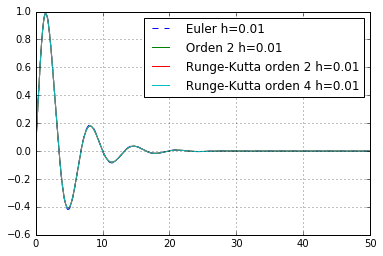

In [7]:
h_1=0.01
h_2=0.01
h_3=0.01
h_4=0.01

t_1,y_1=euler(prueba,[0,1],[0,50],h=h_1)
t_2,y_2=metodo2(prueba,d_prueba,[0,1],[0,50],h=h_2)  
t_3,y_3=runge(prueba,[0,1],[0,50],h=h_3) 
t_4,y_4=runge4(prueba,[0,1],[0,50],h=h_4)   
plot(t_1,y_1[:,0],ls='--', label=" Euler h=%s" %(h_1))
plot(t_2,y_2[:,0],ls='-', label=" Orden 2 h=%s" %h_2)
plot(t_3,y_3[:,0],ls='-', label=" Runge-Kutta orden 2 h=%s" %h_3)
plot(t_4,y_4[:,0],ls='-', label=" Runge-Kutta orden 4 h=%s"%h_4)
grid(True)
legend()
show()

# Problema 2

Encontrar el mejor paso de integración para la siguiente ecuación

$$
\dddot{y}+\ddot{y}^2-3\dot{y}^3+cos^2y=e^{-t}sin3t
$$

Con condiciones iniciales $\ddot{y}(1)=1$,$\dot{y}(1)=2$ y $y(1)=1$. ¿Qué sucede en el intervalo $[1,2]$ y en el intervalo $[1,2.1]$?


Definimos a $\dot{y}=v$, $\ddot{y}=\dot{v}=a$. Así nuestra ecuación se reescribe como $\dot{a}+a^2-3v^3+cos^2y=e^{-t}sin3t$, y podemos escribir a nuestra ecuación como el sistema:
$$
 \begin{pmatrix} \dot y\\\dot v\\\dot a\end{pmatrix} = \begin{pmatrix} v\\a\\e^{-t}sin3t+ 3v^3-cos^2y-a^2\end{pmatrix} 
$$

In [8]:
def ej2(y,t):                          #Definimos aquí al sistema a resolver
    return array([y[1],y[2],exp(-t)*sin(3.*t)+3.*y[1]**3.-(cos(y[0]))**2-(y[2])**2])

def d_ej2(y,t): #Definimos también su derivada explícita con respecto a t y el  jacobiano
    return array([0,0,exp(-t)*(-sin(3.*t)+3.*cos(3.*t))]),array([[0,1,0],[0,0,1],[2.*cos(y[0])*sin(y[0]),9*y[1]**2,-2.*y[2]]])

El paso adecuado de integración depende del intervalo en el que se esté usando los métodos. Por ejemplo, para el intervalo de 0 a 0.8 un paso de 0.001 es suficiente y no provoca error en los métodos

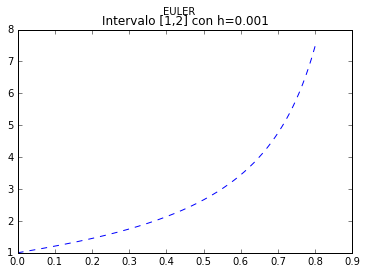

In [9]:
h_6=0.001
t_5,y_5=runge(ej2,[1,2,1],[0,.8],h=h_6)
plot(t_5,y_5[:,0],ls='--')
plt.title(u'Intervalo [1,2] con h=%s' %h_6 )
plt.suptitle(u'EULER')  # Ponemos un título superior
show()

Encontraremos 2 mejores pasos para cada método, uno para el intervalo [1,2] y otro para [1,2.1].

# EULER

 Intervalo $[1,2]$

Graficamos a continuación la solución para diferentes pasos usando Euler

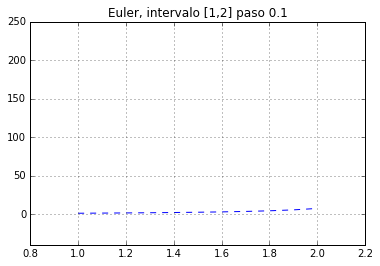

In [98]:
t_5,y_5=euler(ej2,[1,2,1],[1,2],h=.1)
plt.ylim([-40,250])
plot(t_5,y_5[:,0],ls='--')
plt.title(u'Euler, intervalo [1,2] paso 0.1' )
grid(True)


C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app


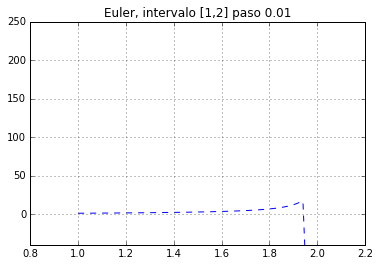

In [99]:
t_5,y_5=euler(ej2,[1,2,1],[1,2],h=.01)
plt.ylim([-40,250])
plot(t_5,y_5[:,0],ls='--')
plt.title(u'Euler, intervalo [1,2] paso 0.01' )
grid(True)

C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in cos
  from ipykernel import kernelapp as app


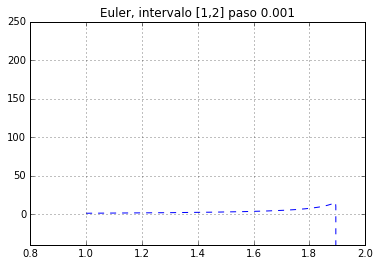

In [100]:
t_5,y_5=euler(ej2,[1,2,1],[1,2],h=.001)
plt.ylim([-40,250])
plot(t_5,y_5[:,0],ls='--')
plt.title(u'Euler, intervalo [1,2] paso 0.001' )
grid(True)

C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in cos
  from ipykernel import kernelapp as app


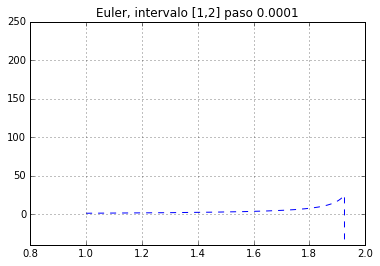

In [101]:
t_5,y_5=euler(ej2,[1,2,1],[1,2],h=.0001)
plt.ylim([-40,250])
plot(t_5,y_5[:,0],ls='--')
plt.title(u'Euler, intervalo [1,2] paso 0.0001' )
grid(True)

C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in cos
  from ipykernel import kernelapp as app


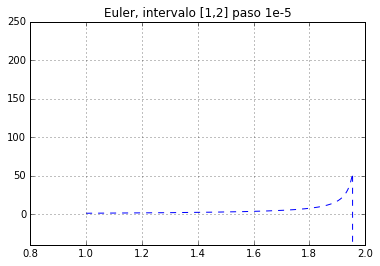

In [102]:
t_5,y_5=euler(ej2,[1,2,1],[1,2],h=.00001)
plt.ylim([-40,250])
plot(t_5,y_5[:,0],ls='--')
plt.title(u'Euler, intervalo [1,2] paso 1e-5' )
grid(True)

C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in cos
  from ipykernel import kernelapp as app


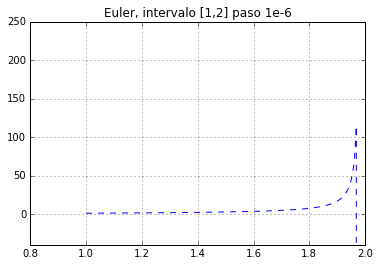

In [103]:
t_5,y_5=euler(ej2,[1,2,1],[1,2],h=.000001)
plt.ylim([-40,250])
plot(t_5,y_5[:,0],ls='--')
plt.title(u'Euler, intervalo [1,2] paso 1e-6' )
grid(True)

C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in cos
  from ipykernel import kernelapp as app


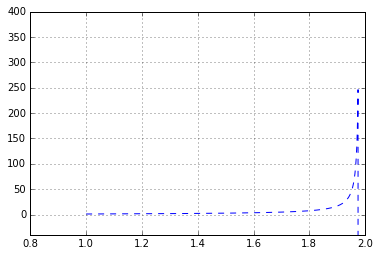

In [91]:
t_5,y_5=euler(ej2,[1,2,1],[1,2],h=.0000001)
plt.ylim([-40,400])
plot(t_5,y_5[:,0],ls='--')
grid(True)

Observamos que mientras aumentamos el paso el pico crece (hasta al menos 250, según nuestras gráficas). Es por ello que no podemos decir que la solución haya comenzado a converger para un paso igual o mayor que cualquiera de los que se usaron arriba.Si existe un paso de integración para el cual la solución converja este es mayor a $1 \times 10^{-7}$ . Lo más sensato sin embargo no sería tratar de calcular la solución para pasos menores, sino aceptar que probablemente ahí la solución tenga una divergencia. En este caso, y dependiendo de con qué precisión se quiere el comportamiento del sistemapara tiempos cercanos al tiempo de la divergencia, se puede tomar la solución obtenida para $1 \times 10^{-7}$  como una buena aproximación.

 Intervalo $[1,2.1]$

Hacemos lo mismo que en intervalo anterior

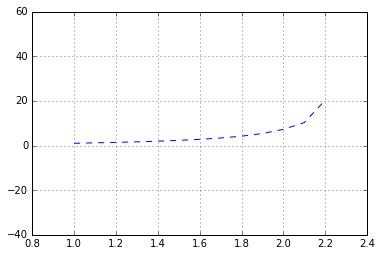

In [92]:
t_5,y_5=euler(ej2,[1,2,1],[1,2.1],h=.1)
plt.ylim([-40,60])
plot(t_5,y_5[:,0],ls='--')
plt.title(u'Euler, intervalo [1,2.1] paso 1e-1' )
grid(True)

C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in cos
  from ipykernel import kernelapp as app


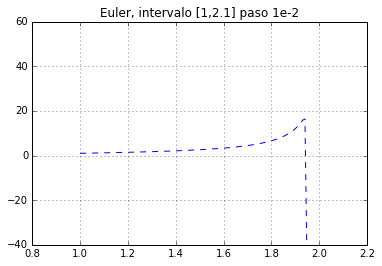

In [104]:
t_5,y_5=euler(ej2,[1,2,1],[1,2.1],h=.01)
plt.ylim([-40,60])
plot(t_5,y_5[:,0],ls='--')
plt.title(u'Euler, intervalo [1,2.1] paso 1e-2' )
grid(True)

C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in cos
  from ipykernel import kernelapp as app


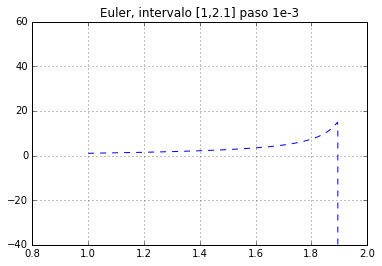

In [105]:
t_5,y_5=euler(ej2,[1,2,1],[1,2.1],h=.001)
plt.ylim([-40,60])
plot(t_5,y_5[:,0],ls='--')
plt.title(u'Euler, intervalo [1,2.1] paso 1e-3' )
grid(True)

C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in cos
  from ipykernel import kernelapp as app


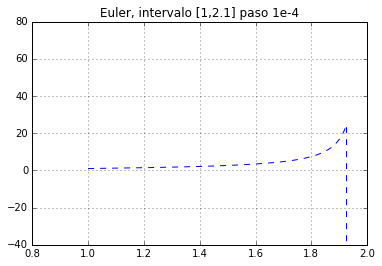

In [106]:
t_5,y_5=euler(ej2,[1,2,1],[1,2.1],h=.0001)
plt.ylim([-40,80])
plot(t_5,y_5[:,0],ls='--')
plt.title(u'Euler, intervalo [1,2.1] paso 1e-4' )
grid(True)

C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in cos
  from ipykernel import kernelapp as app


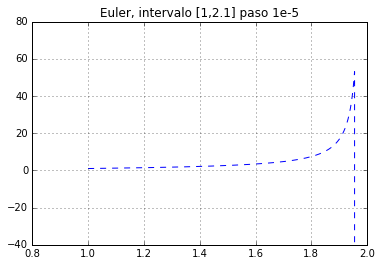

In [107]:
t_5,y_5=euler(ej2,[1,2,1],[1,2.1],h=.00001)
plt.ylim([-40,80])
plot(t_5,y_5[:,0],ls='--')
plt.title(u'Euler, intervalo [1,2.1] paso 1e-5' )
grid(True)

C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in cos
  from ipykernel import kernelapp as app


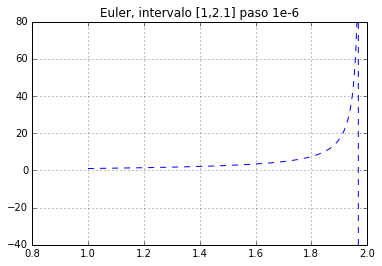

In [108]:
t_5,y_5=euler(ej2,[1,2,1],[1,2.1],h=.000001)
plt.ylim([-40,80])
plot(t_5,y_5[:,0],ls='--')
plt.title(u'Euler, intervalo [1,2.1] paso 1e-6' )
grid(True)

C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in cos
  from ipykernel import kernelapp as app


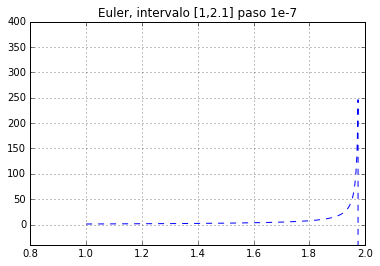

In [109]:
t_5,y_5=euler(ej2,[1,2,1],[1,2.1],h=.0000001)
plt.ylim([-40,400])
plot(t_5,y_5[:,0],ls='--')
plt.title(u'Euler, intervalo [1,2.1] paso 1e-7' )
grid(True)

# METODO DE 2DO ORDEN

Intervalo [1,2]

Hacemos lo mismo que en los casos anteriores

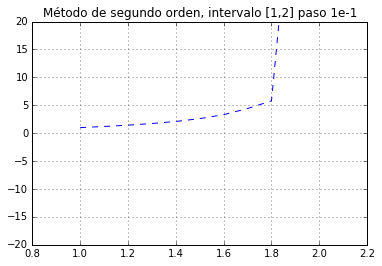

In [124]:
t_5,y_5=metodo2(ej2,d_ej2,[1,2,1],[1,2],h=.1)
plt.ylim([-20,20])
plot(t_5,y_5[:,0],ls='--')
plt.title(u'Método de segundo orden, intervalo [1,2] paso 1e-1' )
grid(True)

C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: overflow encountered in double_scalars
C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: RuntimeWarning: invalid value encountered in add


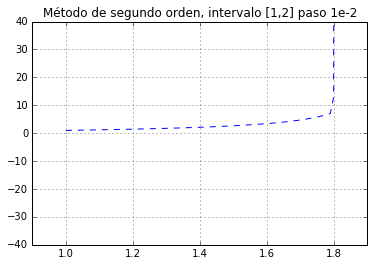

In [125]:
t_5,y_5=metodo2(ej2,d_ej2,[1,2,1],[1,2],h=.01)
plt.ylim([-40,40])
plot(t_5,y_5[:,0],ls='--')
plt.title(u'Método de segundo orden, intervalo [1,2] paso 1e-2' )
grid(True)

C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: RuntimeWarning: invalid value encountered in add


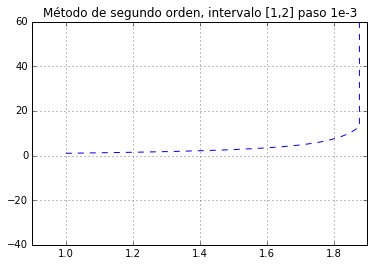

In [126]:
t_5,y_5=metodo2(ej2,d_ej2,[1,2,1],[1,2],h=.001)
plt.ylim([-40,60])
plot(t_5,y_5[:,0],ls='--')
plt.title(u'Método de segundo orden, intervalo [1,2] paso 1e-3' )
grid(True)

C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: RuntimeWarning: invalid value encountered in add


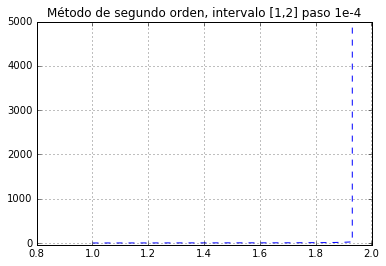

In [127]:
t_5,y_5=metodo2(ej2,d_ej2,[1,2,1],[1,2],h=.0001)
plt.ylim([-40,5000])
plot(t_5,y_5[:,0],ls='--')
plt.title(u'Método de segundo orden, intervalo [1,2] paso 1e-4' )
grid(True)

C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: RuntimeWarning: invalid value encountered in add


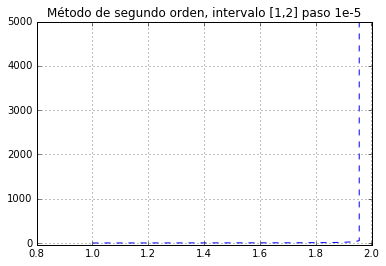

In [128]:
t_5,y_5=metodo2(ej2,d_ej2,[1,2,1],[1,2],h=.00001)
plt.ylim([-40,5000])
plot(t_5,y_5[:,0],ls='--')
plt.title(u'Método de segundo orden, intervalo [1,2] paso 1e-5' )
grid(True)

C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: RuntimeWarning: invalid value encountered in add


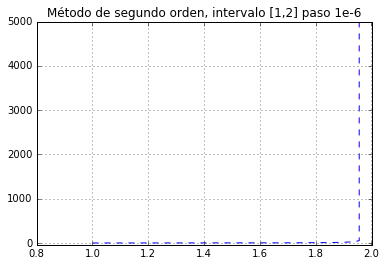

In [129]:
t_5,y_5=metodo2(ej2,d_ej2,[1,2,1],[1,2],h=.00001)
plt.ylim([-40,5000])
plot(t_5,y_5[:,0],ls='--')
plt.title(u'Método de segundo orden, intervalo [1,2] paso 1e-6' )
grid(True)

Las soluciones en este caso se parecen más conforme disminuimos el paso. Podemos decir que a 1e-5 la solución ha convergido, por lo que este puede ser un buen paso de integración

Intervalo [1,2.1]

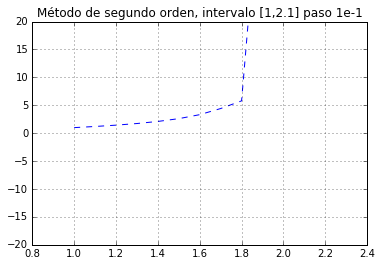

In [130]:
t_5,y_5=metodo2(ej2,d_ej2,[1,2,1],[1,2.1],h=.1)
plt.ylim([-20,20])
plot(t_5,y_5[:,0],ls='--')
plt.title(u'Método de segundo orden, intervalo [1,2.1] paso 1e-1' )
grid(True)

C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: overflow encountered in double_scalars
C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: RuntimeWarning: invalid value encountered in add


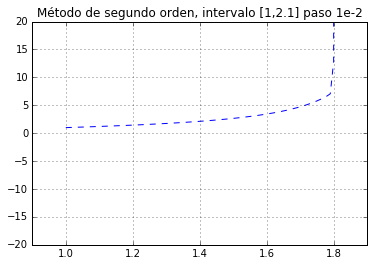

In [131]:
t_5,y_5=metodo2(ej2,d_ej2,[1,2,1],[1,2.1],h=.01)
plt.ylim([-20,20])
plot(t_5,y_5[:,0],ls='--')
plt.title(u'Método de segundo orden, intervalo [1,2.1] paso 1e-2' )
grid(True)

C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: RuntimeWarning: invalid value encountered in add


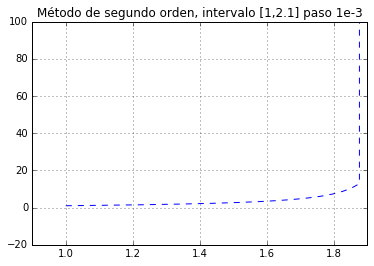

In [133]:
t_5,y_5=metodo2(ej2,d_ej2,[1,2,1],[1,2.1],h=.001)
plt.ylim([-20,100])
plot(t_5,y_5[:,0],ls='--')
plt.title(u'Método de segundo orden, intervalo [1,2.1] paso 1e-3' )
grid(True)

C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: RuntimeWarning: invalid value encountered in add


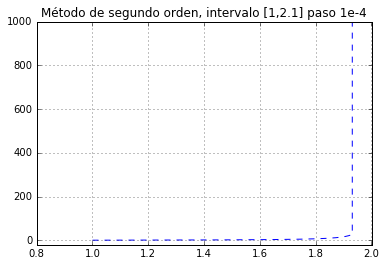

In [134]:
t_5,y_5=metodo2(ej2,d_ej2,[1,2,1],[1,2.1],h=.0001)
plt.ylim([-20,1000])
plot(t_5,y_5[:,0],ls='--')
plt.title(u'Método de segundo orden, intervalo [1,2.1] paso 1e-4' )
grid(True)

C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: RuntimeWarning: invalid value encountered in add


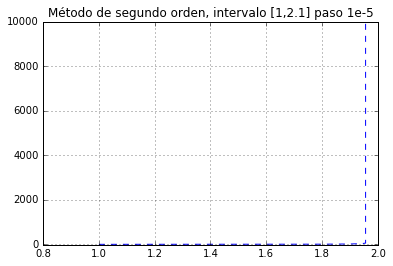

In [135]:
t_5,y_5=metodo2(ej2,d_ej2,[1,2,1],[1,2.1],h=.00001)
plt.ylim([-20,10000])
plot(t_5,y_5[:,0],ls='--')
plt.title(u'Método de segundo orden, intervalo [1,2.1] paso 1e-5' )
grid(True)

C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: overflow encountered in double_scalars
C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: RuntimeWarning: invalid value encountered in add


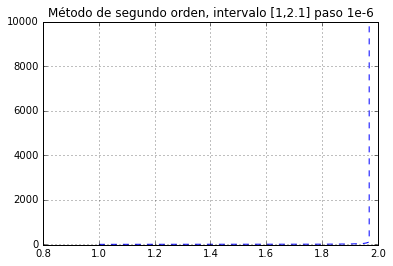

In [136]:
t_5,y_5=metodo2(ej2,d_ej2,[1,2,1],[1,2.1],h=.000001)
plt.ylim([-20,10000])
plot(t_5,y_5[:,0],ls='--')
plt.title(u'Método de segundo orden, intervalo [1,2.1] paso 1e-6' )
grid(True)

Al igual que en el intervalo anterior la solución converje para 1e-5, por lo que elegimos ese número como un buen paso de integración

# RUNGE-KUTTA 2D0 ORDEN

Intervalo [1,2]

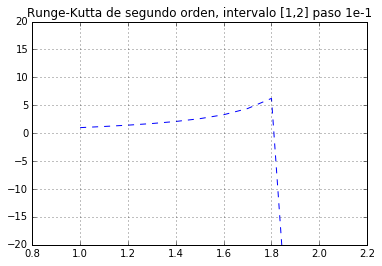

In [146]:
t_5,y_5=runge(ej2,[1,2,1],[1,2],h=.1)
plt.ylim([-20,20])
plot(t_5,y_5[:,0],ls='--')
plt.title(u'Runge-Kutta de segundo orden, intervalo [1,2] paso 1e-1' )
grid(True)

C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in cos
  from ipykernel import kernelapp as app


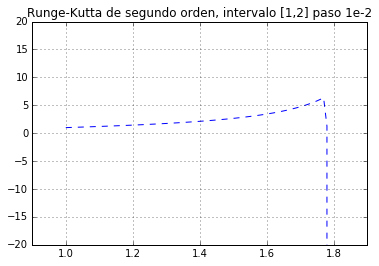

In [147]:
t_5,y_5=runge(ej2,[1,2,1],[1,2],h=.01)
plt.ylim([-20,20])
plot(t_5,y_5[:,0],ls='--')
plt.title(u'Runge-Kutta de segundo orden, intervalo [1,2] paso 1e-2' )
grid(True)

C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in cos
  from ipykernel import kernelapp as app


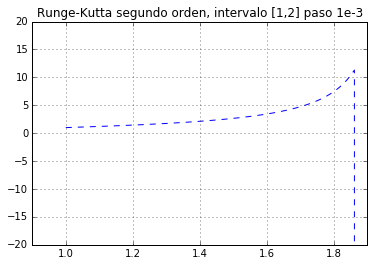

In [148]:
t_5,y_5=runge(ej2,[1,2,1],[1,2],h=.001)
plt.ylim([-20,20])
plot(t_5,y_5[:,0],ls='--')
plt.title(u'Runge-Kutta segundo orden, intervalo [1,2] paso 1e-3' )
grid(True)

In [162]:
t_5,y_5=runge(ej2,[1,2,1],[1,2],h=.0001)
plt.ylim([-20,60])
plot(t_5,y_5[:,0],ls='--')
plt.title(u't_5,y_5=runge(ej2,[1,2,1],[1,2],h=.000001)
plt.ylim([-20,100])
plot(t_5,y_5[:,0],ls='--')
plt.title(u'Runge-Kutta de segundo orden, intervalo [1,2] paso 1e-6' )
grid(True)

SyntaxError: EOL while scanning string literal (<ipython-input-162-e43842a812fc>, line 4)

C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in cos
  from ipykernel import kernelapp as app


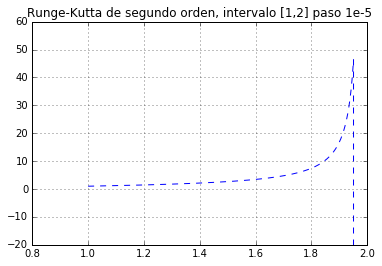

In [150]:
t_5,y_5=runge(ej2,[1,2,1],[1,2],h=.00001)
plt.ylim([-20,60])
plot(t_5,y_5[:,0],ls='--')
plt.title(u'Runge-Kutta de segundo orden, intervalo [1,2] paso 1e-5' )
grid(True)

C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in cos
  from ipykernel import kernelapp as app


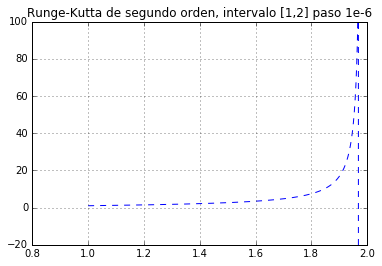

In [151]:
t_5,y_5=runge(ej2,[1,2,1],[1,2],h=.000001)
plt.ylim([-20,100])
plot(t_5,y_5[:,0],ls='--')
plt.title(u'Runge-Kutta de segundo orden, intervalo [1,2] paso 1e-6' )
grid(True)

C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in cos
  from ipykernel import kernelapp as app


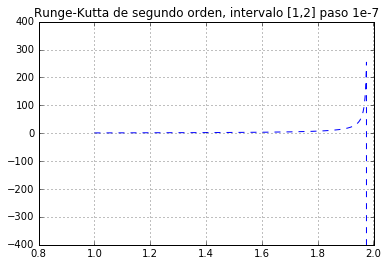

In [152]:
t_5,y_5=runge(ej2,[1,2,1],[1,2],h=.0000001)
plt.ylim([-400,400])
plot(t_5,y_5[:,0],ls='--')
plt.title(u'Runge-Kutta de segundo orden, intervalo [1,2] paso 1e-7' )
grid(True)

Al igual que en el caso de Euler, el pico presentado por las soluciones crece conforme se aumenta el paso, por lo que no existe paso para el que la solución converja en el sentido extricto de la palabra. Una vez, más, si no nos interesa mucho el comportamiento cerca del tiempo en donde ocurre la divergencia, podemos tomas como paso 1e-7

Intervalo [1,2.1]

C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app


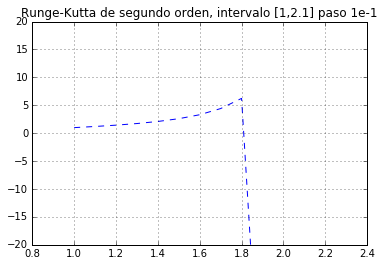

In [153]:
t_5,y_5=runge(ej2,[1,2,1],[1,2.1],h=.1)
plt.ylim([-20,20])
plot(t_5,y_5[:,0],ls='--')
plt.title(u'Runge-Kutta de segundo orden, intervalo [1,2.1] paso 1e-1' )
grid(True)

C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in cos
  from ipykernel import kernelapp as app


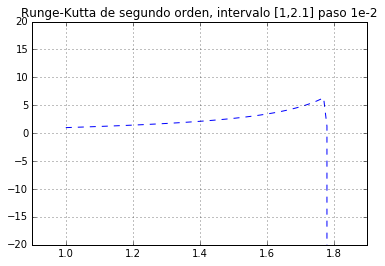

In [154]:
t_5,y_5=runge(ej2,[1,2,1],[1,2.1],h=.01)
plt.ylim([-20,20])
plot(t_5,y_5[:,0],ls='--')
plt.title(u'Runge-Kutta de segundo orden, intervalo [1,2.1] paso 1e-2' )
grid(True)

C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in cos
  from ipykernel import kernelapp as app


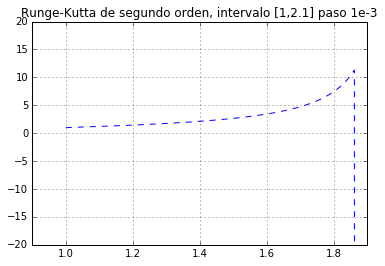

In [155]:
t_5,y_5=runge(ej2,[1,2,1],[1,2.1],h=.001)
plt.ylim([-20,20])
plot(t_5,y_5[:,0],ls='--')
plt.title(u'Runge-Kutta de segundo orden, intervalo [1,2.1] paso 1e-3' )
grid(True)

C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in cos
  from ipykernel import kernelapp as app


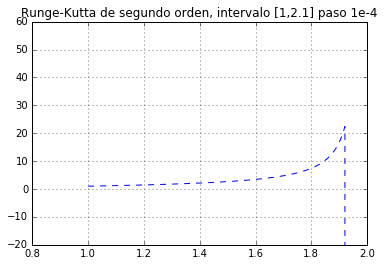

In [159]:
t_5,y_5=runge(ej2,[1,2,1],[1,2.1],h=.0001)
plt.ylim([-20,60])
plot(t_5,y_5[:,0],ls='--')
plt.title(u'Runge-Kutta de segundo orden, intervalo [1,2.1] paso 1e-4' )
grid(True)

C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in cos
  from ipykernel import kernelapp as app


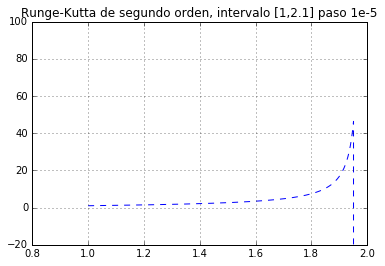

In [160]:
t_5,y_5=runge(ej2,[1,2,1],[1,2.1],h=.00001)
plt.ylim([-20,100])
plot(t_5,y_5[:,0],ls='--')
plt.title(u'Runge-Kutta de segundo orden, intervalo [1,2.1] paso 1e-5' )
grid(True)

C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in cos
  from ipykernel import kernelapp as app


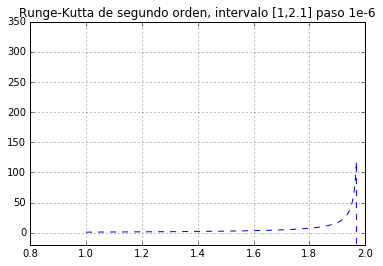

In [161]:
t_5,y_5=runge(ej2,[1,2,1],[1,2.1],h=.000001)
plt.ylim([-20,350])
plot(t_5,y_5[:,0],ls='--')
plt.title(u'Runge-Kutta de segundo orden, intervalo [1,2.1] paso 1e-6' )
grid(True)

Se concluye lo mismo que para el intervalo anterior

# RUNGE-KUTTA DE 4TO ORDEN

Intervalo [1,2]

C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in cos
  from ipykernel import kernelapp as app


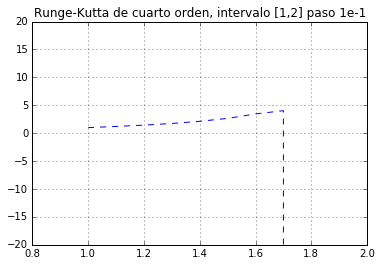

In [163]:
t_5,y_5=runge4(ej2,[1,2,1],[1,2],h=.1)
plt.ylim([-20,20])
plot(t_5,y_5[:,0],ls='--')
plt.title(u'Runge-Kutta de cuarto orden, intervalo [1,2] paso 1e-1' )
grid(True)

C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in cos
  from ipykernel import kernelapp as app


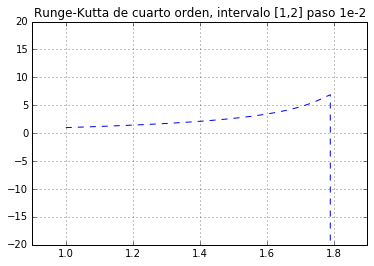

In [164]:
t_5,y_5=runge4(ej2,[1,2,1],[1,2],h=.01)
plt.ylim([-20,20])
plot(t_5,y_5[:,0],ls='--')
plt.title(u'Runge-Kutta de cuarto orden, intervalo [1,2] paso 1e-2' )
grid(True)

C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in cos
  from ipykernel import kernelapp as app


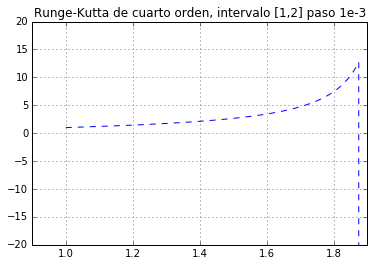

In [165]:
t_5,y_5=runge4(ej2,[1,2,1],[1,2],h=.001)
plt.ylim([-20,20])
plot(t_5,y_5[:,0],ls='--')
plt.title(u'Runge-Kutta de cuarto orden, intervalo [1,2] paso 1e-3' )
grid(True)

C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in cos
  from ipykernel import kernelapp as app


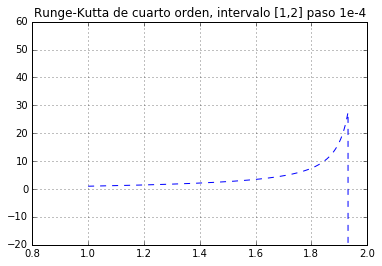

In [166]:
t_5,y_5=runge4(ej2,[1,2,1],[1,2],h=.0001)
plt.ylim([-20,60])
plot(t_5,y_5[:,0],ls='--')
plt.title(u'Runge-Kutta de cuarto orden, intervalo [1,2] paso 1e-4' )
grid(True)

C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in cos
  from ipykernel import kernelapp as app


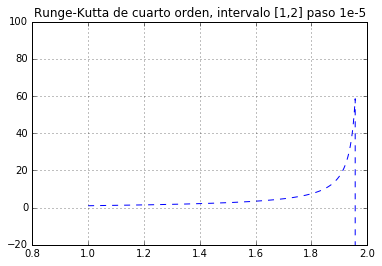

In [167]:
t_5,y_5=runge4(ej2,[1,2,1],[1,2],h=.00001)
plt.ylim([-20,100])
plot(t_5,y_5[:,0],ls='--')
plt.title(u'Runge-Kutta de cuarto orden, intervalo [1,2] paso 1e-5' )
grid(True)

C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in cos
  from ipykernel import kernelapp as app


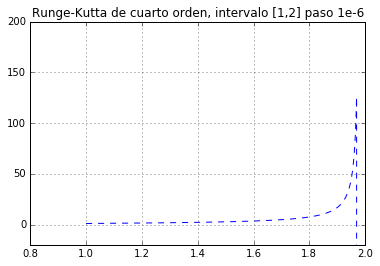

In [168]:
t_5,y_5=runge4(ej2,[1,2,1],[1,2],h=.000001)
plt.ylim([-20,200])
plot(t_5,y_5[:,0],ls='--')
plt.title(u'Runge-Kutta de cuarto orden, intervalo [1,2] paso 1e-6' )
grid(True)

C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in cos
  from ipykernel import kernelapp as app


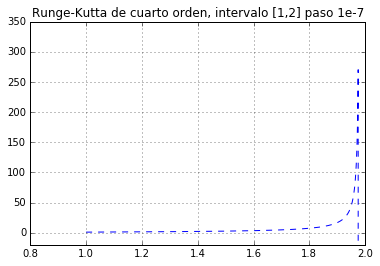

In [169]:
t_5,y_5=runge4(ej2,[1,2,1],[1,2],h=.0000001)
plt.ylim([-20,350])
plot(t_5,y_5[:,0],ls='--')
plt.title(u'Runge-Kutta de cuarto orden, intervalo [1,2] paso 1e-7' )
grid(True)

Se concluye lo mismo que en el caso de Euler y de Runge-Kutta orden 2.

Intervalo [1,2.1]

C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in cos
  from ipykernel import kernelapp as app


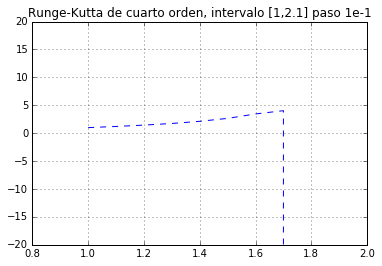

In [171]:
t_5,y_5=runge4(ej2,[1,2,1],[1,2.1],h=.1)
plt.ylim([-20,20])
plot(t_5,y_5[:,0],ls='--')
plt.title(u'Runge-Kutta de cuarto orden, intervalo [1,2.1] paso 1e-1' )
grid(True)

C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in cos
  from ipykernel import kernelapp as app


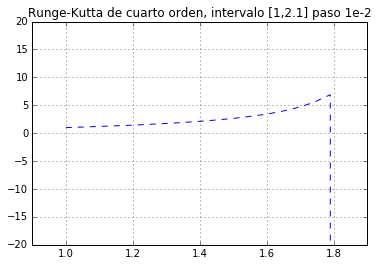

In [172]:
t_5,y_5=runge4(ej2,[1,2,1],[1,2.1],h=.01)
plt.ylim([-20,20])
plot(t_5,y_5[:,0],ls='--')
plt.title(u'Runge-Kutta de cuarto orden, intervalo [1,2.1] paso 1e-2' )
grid(True)

C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in cos
  from ipykernel import kernelapp as app


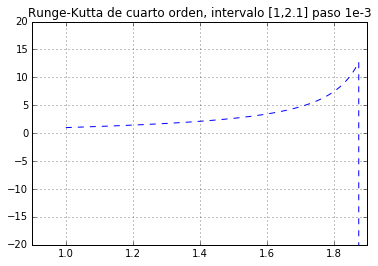

In [173]:
t_5,y_5=runge4(ej2,[1,2,1],[1,2.1],h=.001)
plt.ylim([-20,20])
plot(t_5,y_5[:,0],ls='--')
plt.title(u'Runge-Kutta de cuarto orden, intervalo [1,2.1] paso 1e-3' )
grid(True)

C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in cos
  from ipykernel import kernelapp as app


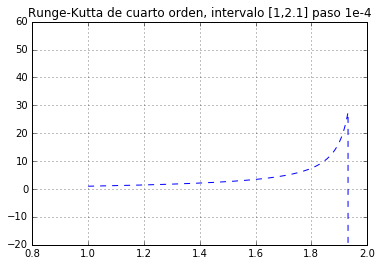

In [174]:
t_5,y_5=runge4(ej2,[1,2,1],[1,2.1],h=.0001)
plt.ylim([-20,60])
plot(t_5,y_5[:,0],ls='--')
plt.title(u'Runge-Kutta de cuarto orden, intervalo [1,2.1] paso 1e-4' )
grid(True)

C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in cos
  from ipykernel import kernelapp as app


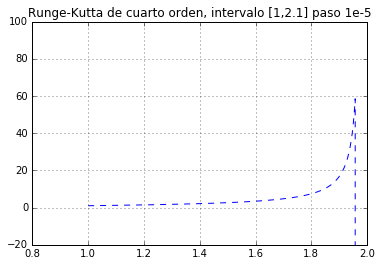

In [175]:
t_5,y_5=runge4(ej2,[1,2,1],[1,2.1],h=.00001)
plt.ylim([-20,100])
plot(t_5,y_5[:,0],ls='--')
plt.title(u'Runge-Kutta de cuarto orden, intervalo [1,2.1] paso 1e-5' )
grid(True)

C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in cos
  from ipykernel import kernelapp as app


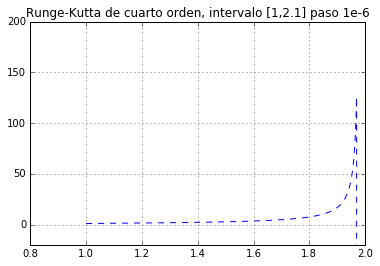

In [176]:
t_5,y_5=runge4(ej2,[1,2,1],[1,2.1],h=.000001)
plt.ylim([-20,200])
plot(t_5,y_5[:,0],ls='--')
plt.title(u'Runge-Kutta de cuarto orden, intervalo [1,2.1] paso 1e-6' )
grid(True)

C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\Silvia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in cos
  from ipykernel import kernelapp as app


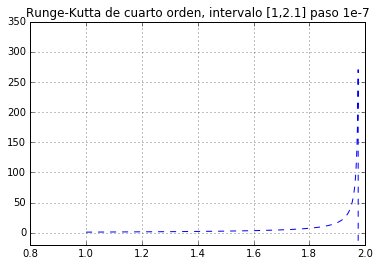

In [177]:
t_5,y_5=runge4(ej2,[1,2,1],[1,2.1],h=.0000001)
plt.ylim([-20,350])
plot(t_5,y_5[:,0],ls='--')
plt.title(u'Runge-Kutta de cuarto orden, intervalo [1,2.1] paso 1e-7' )
grid(True)

Conluimos lo mismo que para el intervalo anterior.

# Problema 3

Modificar las funciones de 1 tal que se puedan pasar argumentos opcionales al sistema de ecuaciones de tal manera que se puedan modificar parámetros al momento de hacer la integración

Modificación de los métodos usados anteriormente:

In [65]:

def euler_ar(ec,p_ini,x,args=0,h=0.01):  
    tiempos=arange(x[0],x[1]+h,h)       
    sol=zeros((len(tiempos),len(p_ini)))  
    sol[0,:] = p_ini 
    if args==0:
        for i in range(len(tiempos)-1):
            sol[i+1,:] = sol[i,:]+ec(sol[i,:],tiempos[i])*h
    else:
         for i in range(len(tiempos)-1):
            sol[i+1,:] = sol[i,:]+ec(sol[i,:],tiempos[i],args)*h
            solucion = [tiempos,sol]
    return solucion




def metodo2_ar(ec, d_ec, p_ini, x,args=0 ,h=0.1):  
    tiempos=arange(x[0],x[1]+h,h)        
    sol=zeros((len(tiempos),len(p_ini)))    
    sol[0,:] = p_ini
    if args==0:
        for i in arange(len(tiempos)-1): 
            f=ec(sol[i,:],tiempos[i])
            df,jac=d_ec(sol[i,:], tiempos[i])       
            sol[i+1,:]=sol[i,:]+h*f+0.5*h*h*(df+ dot (jac,f))  
    else:
         for i in arange(len(tiempos)-1): 
            f=ec(sol[i,:],tiempos[i],args)
            df,jac=d_ec(sol[i,:], tiempos[i],args)       
            sol[i+1,:]=sol[i,:]+h*f+0.5*h*h*(df+ dot (jac,f)) 
    return  tiempos,sol



def runge_ar(ec, p_ini, x,args=0, h=0.1):
    tiempos=arange(x[0],x[1]+h,h)
    sol=zeros((len(tiempos),len(p_ini)))   
    sol[0,:] = p_ini
    if args==0:
        for i in range(len(tiempos)-1):    
            k=ec(sol[i,:], tiempos[i])*h
            sol[i+1,:]=sol[i,:]+h*ec(sol[i,:]+0.5*k, tiempos[i]+.5*h)
    else:
         for i in range(len(tiempos)-1):    
            k=ec(sol[i,:], tiempos[i],args)*h
            sol[i+1,:]=sol[i,:]+h*ec(sol[i,:]+0.5*k, tiempos[i]+.5*h,args)
        
    return  tiempos,sol




def rk4_ar(ec,p_ini,x,args=0,h=0.01):
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    if args==0:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i])
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    else:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i],args)
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h,args)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h,args)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h,args)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    return tiempos,sol

Obtener ahora la solución a la siguiente ecuación diferencial
$$
\ddot{x}+0.1 \dot{x}+4sinx=0.5sin\omega t
$$

Con condicones iniciales $\dot{x}(0)=1$ y $x(0)=0$, para $\omega=\{1,1.1,1.2,...,2.9,3\}$. Realice la gráfica de algunas soluciones que representen el comportamiento de la solución en función de $\omega$.

Haciendo $\dot{x}=v$ obtenemos el sistema

$$
 \begin{pmatrix} \dot x\\\dot v\end{pmatrix} = \begin{pmatrix} v\\0.5sin\omega t-4sinx-0.1 v \end{pmatrix} 
$$

Programamos la ecuación y su jacobiano

In [66]:
def ej3(x,t,omega=0):
    dx=x[1]
    if omega == 0:
        dv=-4*sin(x[0])-0.1*x[1]
    else:
        dv=0.5*sin(omega*t)-4*sin(x[0])-0.1*x[1]
    return array([dx,dv])

def d_ej3(x,t,omega=0):
    jac=array([0,1], [-4*cos(x),0.1])
    if omega == 0:
        dt=array([0,0.5*omega*cos(omega*t)])
    else:
        dv=0.5*sin(omega*t)-4*sin(x[0])-0.1*x[1]
    return dt,jac


In [73]:
y_eul=[zeros(20)]
y_2dm=[zeros(20)]
y_rk2=[zeros(20)]
y_rk4=[zeros(20)]

for i in range(20):
    y_eul.append(zeros(20))  #Creamos los arreglos que contendrán la solución de la ecuación. Estos serán tales que y_eul[i]
    y_rk2.append(zeros(20)) # será la solución para omega=1+0.1i
    y_rk4.append(zeros(20))
    y_2dm.append(zeros(20))

In [87]:
for i in range(20):
    omega=1+0.1*i
    t,y_eul[i]=euler_ar(ej3,[0,1],[0,50],omega,.01)
    t,y_2dm[i]=runge_ar(ej3,[0,1],[0,100],omega,.01)
    t,y_rk2[i]=runge_ar(ej3,[0,1],[0,100],omega,.01)
    t,y_rk4[i]=runge_ar(ej3,[0,1],[0,100],omega,.01)
    
    


Usemos la solución obtenida por el método de euler para observar cómo es que cambia la solución si variamos $\omega$

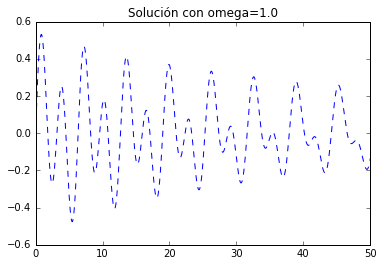

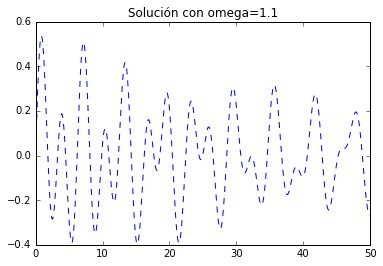

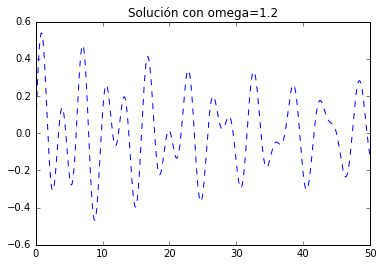

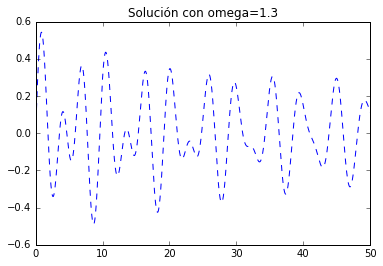

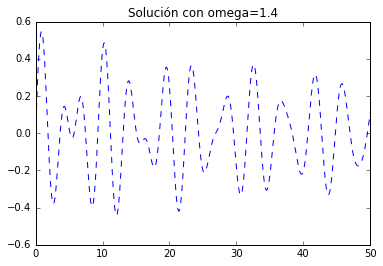

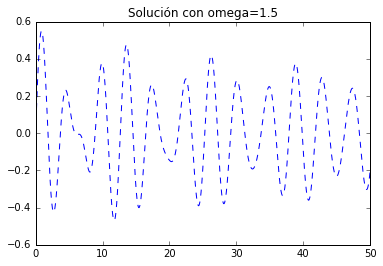

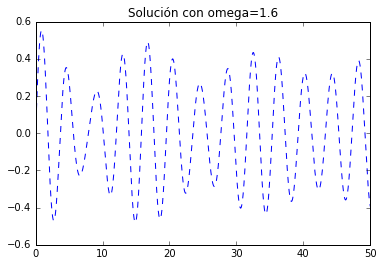

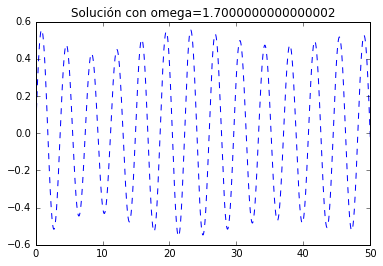

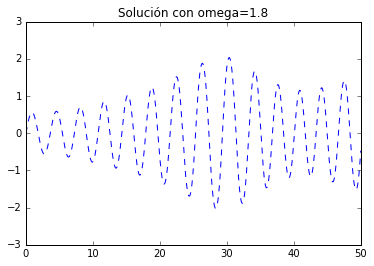

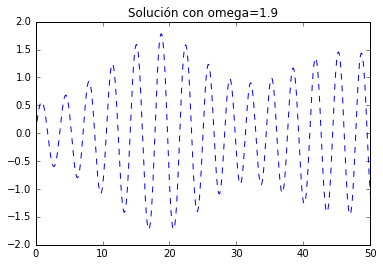

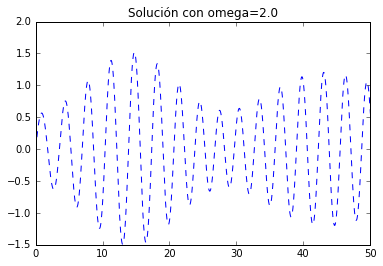

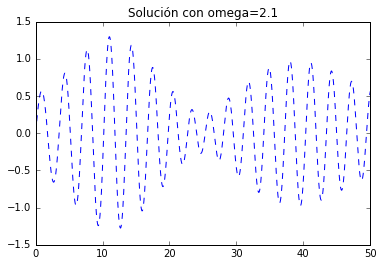

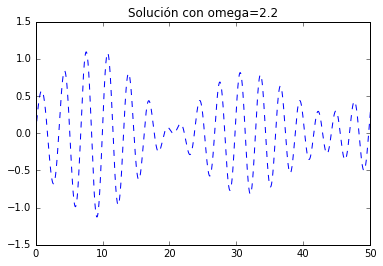

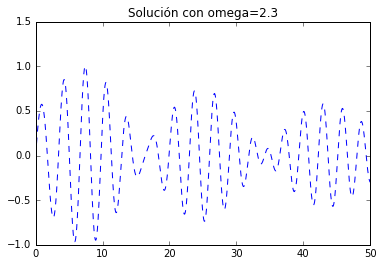

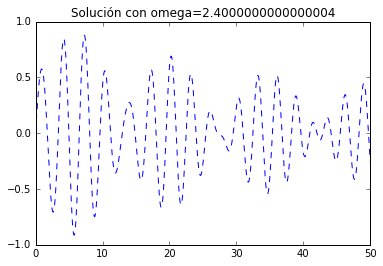

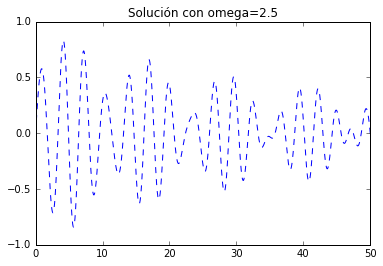

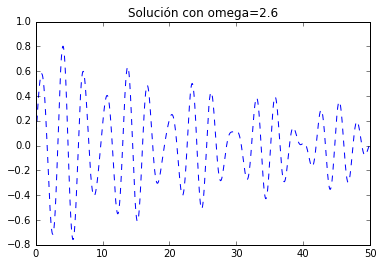

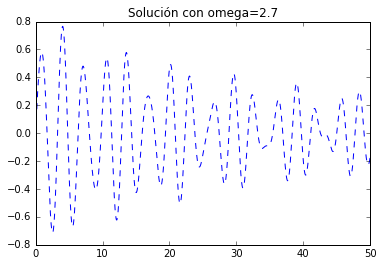

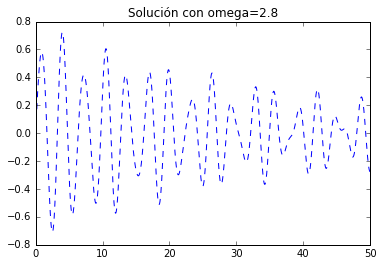

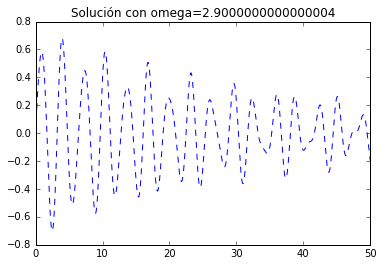

In [88]:
for i in range(20):
    plot(t,y_eul[i][:,0],ls="--")
    plt.title(u'Solución con omega=%s' %(1+0.1*i) )
    show()

Evidentemente la solución cambia conforme variamos $\omega$. Esto lo podemos entender ya que la ecuación que se está resolviendo es del tipo 
$$
\ddot{x}+\omega_0^2sinx=g(x,t)
$$

que es un oscilador con fuerza externa. En este caso $g=-0.1\dot{x}+0.5sin\omega t$ y $\omega_0=2$. La fuerza g  tiene un término de fricción y un término de fuerza periódica. Los dos términos son comparables, es decir no podemos despreciar ninguno en el análisis.

Otra observación es que si se realiza la integración para un tiempo grande (digamos 500)se observa que las oscilaciones nunca decrecen hasta cero y que en promedio tienen la misma amplitud (la amplitud final dependerá de la frecuencia de la fuerza externa). Esto quiere decir que a pesar de la fricción el péndulo no se detendrá, gracias a la fuerza periódica externa.

Ilustramos lo que se dijo acerca de tiempos grandes:

In [ ]:
for i in range(20):
    omega=1+0.1*i
    t,y_eul[i]=euler_ar(ej3,[0,1],[0,500],omega,.01)
    plot(t,y_eul[i][:,0],ls="--")
    plt.title(u'Solución con omega=%s' %(1+0.1*i) )
    show()

# Problema 4

Considerar el siguiente sistema:
$$
\dot{x}=10(y-x)\\
\dot{y}=x(28-z)-y\\
\dot{z}=xy-8/3z\\
$$

Realizar integración numérica

a) Elija una condición inicial aleatoria en el $x, y, z ∈ [−5, 5]$ y realice la gráfica de la solución en el
plano xy, xz y yz y comente sus observaciones

In [94]:
def ej4(x,t):
    return array([10*(x[1]-x[0]),x[0]*(28-x[2])-x[1],x[0]*x[1]-8*x[2]/3])

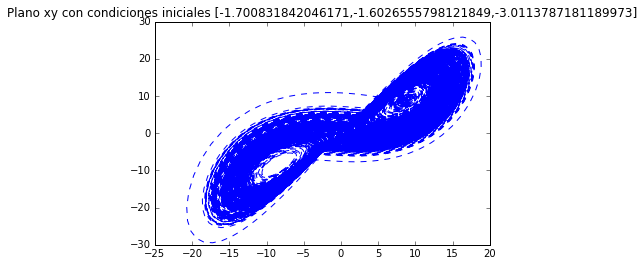

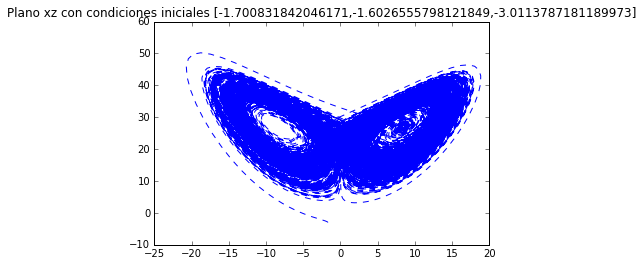

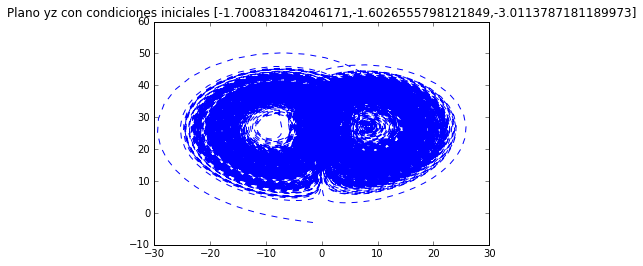

In [93]:
x_ini=5*(rand()-1)
y_ini=5*(rand()-1)
z_ini=5*(rand()-1)
t,x_eu=runge4(ej4,[x_ini,y_ini,z_ini],[0,500],.01)
plot(x_eu[:,0],x_eu[:,1],ls="--")
plt.title(u'Plano xy con condiciones iniciales [%s,%s,%s]' %(x_ini, y_ini, z_ini) )
show()
plot(x_eu[:,0],x_eu[:,2],ls="--")
plt.title(u'Plano xz con condiciones iniciales [%s,%s,%s]' %(x_ini, y_ini, z_ini) )
show()
plot(x_eu[:,1],x_eu[:,2],ls="--")
plt.title(u'Plano yz con condiciones iniciales [%s,%s,%s]' %(x_ini, y_ini, z_ini) )

Observaciones:

1. Si se cambia el tiempo de integración a uno más corto podemos ver que la solución se concentra en un área cercana al punto $p_1$=(10,10,27) o al punto $p_2=$ (-7,-10,27). Conforme se aumenta el tiempo considerado, la solución se aleja del primer punto (ya sea $p_1$ o $p_2$) y comienza a girar en torno al otro punto.

2. A grandes rasgos, las gráficas no cambian demasiado para diferentes condiciones iniciales. Se obtienen formas de 8 alrededor de los puntos mencionados. Sin embargo , para el mismo tiempo de integración pueden obtenerse gráficas diferentes: por ejemplo, para un tiempo de integración $t=15$ hay condiciones iniciales tales que la solución ya ha dado la vuelta varias veces a $p_2$ Y se encuentra de regreso a $p_1$. Para otras condiciones la solución no ha dado ni una vuelta a $p_2$

In [221]:

y_ini_1=-10.99
y_ini_2=-10.985
y_ini_3=-10.980

t,x_eu_1=runge4(ej4,[5,y_ini_1,5],[0,100],.01)
t,x_eu_2=runge4(ej4,[5,y_ini_2,5],[0,100],.01)
t,x_eu_3=runge4(ej4,[5,y_ini_3,5],[0,100],.01)



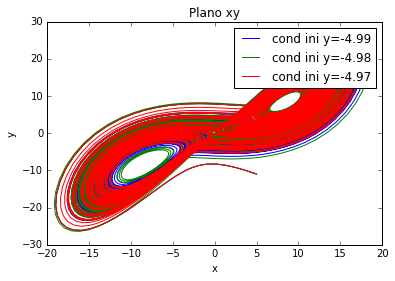

In [222]:
plt.title(u'Plano xy'  )
plot(x_eu_1[:,0],x_eu_1[:,1],label="cond ini y=-4.99")
plot(x_eu_2[:,0],x_eu_2[:,1],label="cond ini y=-4.98")
plot(x_eu_3[:,0],x_eu_3[:,1],label="cond ini y=-4.97")

plt.xlabel('x')
plt.ylabel('y')
legend()
show()


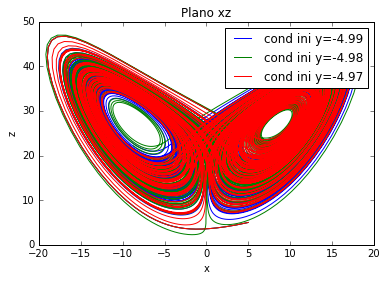

In [223]:
plt.title(u'Plano xz'  )
plot(x_eu_1[:,0],x_eu_1[:,2],label="cond ini y=-4.99")
plot(x_eu_2[:,0],x_eu_2[:,2],label="cond ini y=-4.98")
plot(x_eu_3[:,0],x_eu_3[:,2],label="cond ini y=-4.97")

plt.xlabel('x')
plt.ylabel('z')
legend()
show()


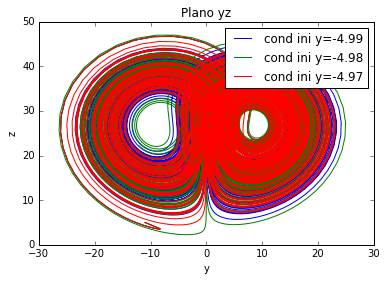

In [224]:
plt.title(u'Plano yz'  )
plot(x_eu_1[:,1],x_eu_1[:,2],label="cond ini y=-4.99")
plot(x_eu_2[:,1],x_eu_2[:,2],label="cond ini y=-4.98")
plot(x_eu_3[:,1],x_eu_3[:,2],label="cond ini y=-4.97")

plt.xlabel('y')
plt.ylabel('z')
legend()
show()

Se puede observar que las soluciones no son las mismas: en los tres planos hay zonas por las que sólo una de las soluciones pasa. Podemos concluir que condiciones iniciales parecidas llevan a soluciones cualitativamente similares pero no idénticas o "muy cercanas" ( en el sentido que si una de las soluciones pasa por un punto no podemos asegurar que para un tiempo similar otra de las soluciones pase por un punto cercano)